### Инструкция по выполнению проекта:

Вы - маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несколько прошлых месяцев ваш бизнес постоянно нес убытки - в привлечение пользователей была вложена куча денег, а толку никакого. Вам нужно разобраться в причинах этой ситуации.

У вас в распоряжении есть лог сервера с данными о посещениях приложения новыми пользователями, зарегистрировавшимися в период с 2019-05-01 по 2019-10-27, выгрузка их покупок за этот период, а также статистика рекламных расходов. Вам предстоит изучить, как люди пользуются продуктом, когда они начинают покупать, сколько денег приносит каждый клиент, когда он окупается и какие факторы отричательно влияют на привлечение пользователей.

#### Шаг 1. Загрузите данные и подготовьте их к анализу
Загрузите данные о визитах, заказах и расходах в переменные. Оптимизируйте данные для анализа. Убедитесь, что тип данных в каждой колонке — правильный. Путь к файлам:

 -   /datasets/visits_info_short.csv. Скачать датасет
 -   /datasets/orders_info_short.csv. Скачать датасет
 -   /datasets/costs_info_short.csv. Скачать датасет
 
#### Шаг 2. Задайте функции для расчета и анализа LTV, ROI, удержания и конверсии

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

#### Шаг 3. Проведите исследовательский анализ данных

Постройте профили пользователей. Определите минимальную и максимальную дату привлечения пользователей.

Выясните:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?.

#### Шаг 4. Маркетинг
Выясните:

- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

#### Шаг 5. Оцените окупаемость рекламы для привлечения пользователей

С помощью LTV и ROI:
- Проанализируйте общую окупаемость рекламы;
- Проанализируйте окупаемость рекламы с разбивкой по устройствам;
- Проанализируйте окупаемость рекламы с разбивкой по странам;
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам.

Опишите проблемы, которые вы обнаружили. Ответьте на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Опишите возможные причины обнаруженных проблем и сформируйте рекомендации для рекламного отдела. При решении этого шага считайте, что вы смотрите данные 1-го ноября 2019 года и что в вашей организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

Подумайте, нужно ли включать в анализ органических пользователей?

#### Шаг 6. Напишите выводы
- Выделите причины неэффективности привлечения пользователей;
- Сформируйте рекомендации для отдела маркетинга для повышения эффективности.

#### Оформление: 
Задание выполните в Jupyter Notebook. Программный код заполните в ячейках типа code, текстовые пояснения — в ячейках типа markdown. Примените форматирование и заголовки.


#### Описание данных
Таблица visits_log_short (лог сервера с информацией о посещениях сайта):

    User Id — уникальный идентификатор пользователя
    Device — категория устройства пользователя
    Session start — дата и время начала сессии
    Session End — дата и время окончания сессии
    Channel — идентификатор рекламного источника, из которого пришел пользователь
    Region - страна пользователя

Таблица orders_log_short (информация о заказах):

    User Id — уникальный id пользователя, который сделал заказ
    Event Dt — дата и время покупки
    Revenue — выручка

Таблица costs_short (информация о затратах на маркетинг):

    Channel — идентификатор рекламного источника
    Dt — дата
    Costs — затраты на этот рекламный источник в этот день

<a id='import'></a>
# Импорт библиотек #

In [1]:
import numpy as np
import pandas as pd
import warnings
from IPython.core.display_functions import display
from datetime import timedelta, datetime
import plotly_express as px
from matplotlib import pyplot as plt
import plotly.graph_objects as go
import seaborn as sns


warnings.filterwarnings('ignore')

<a id='user_functions'></a>
# Пользовательские функции #

## Функция переименования столбцов ##

In [2]:
def prepare_columns(dataframe):
    dataframe.columns = dataframe.columns.str.lower()
    dataframe.columns = dataframe.columns.str.strip()
    dataframe.columns = dataframe.columns.str.replace(' ', '_')

## Функция обработки строковых значений ##

In [3]:
def prepare_string(dataframe):
    for column in dataframe.columns:
        if dataframe.dtypes[column] == 'object':
            dataframe[column] = dataframe[column].str.lower()
            dataframe[column] = dataframe[column].str.strip()

<a id='data'></a>
# Загрузка данных #

In [4]:
data_visits = pd.read_csv(filepath_or_buffer='datasets/visits_info_short.csv')
data_orders = pd.read_csv(filepath_or_buffer='datasets/orders_info_short.csv')
data_costs = pd.read_csv(filepath_or_buffer='datasets/costs_info_short.csv')

<a id='data_preview'></a>
## Первичный осмотр данных ##

In [5]:
print(data_visits.info())
print('############')
print(data_orders.info())
print('############')
print(data_costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
None
############
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
None
############
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data colum

In [6]:
display(data_visits)
display(data_orders)
display(data_costs)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
...,...,...,...,...,...,...
309896,329994900775,UK,PC,LeapBob,2019-10-31 13:28:12,2019-10-31 14:39:29
309897,334903592310,France,PC,lambdaMediaAds,2019-10-31 22:14:52,2019-10-31 22:39:36
309898,540102010126,Germany,PC,organic,2019-10-31 01:40:48,2019-10-31 01:41:31
309899,308736936846,Germany,Mac,organic,2019-10-31 07:37:34,2019-10-31 07:37:55


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
...,...,...,...
40207,651604369137,2019-10-31 16:19:07,4.99
40208,275341387049,2019-10-31 01:17:17,4.99
40209,374656616484,2019-10-31 06:17:29,4.99
40210,168548862926,2019-10-31 22:46:19,4.99


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0
1796,2019-10-24,lambdaMediaAds,6.4
1797,2019-10-25,lambdaMediaAds,8.8
1798,2019-10-26,lambdaMediaAds,8.8


In [7]:
print(data_visits.isnull().sum())
print('############')
print(data_orders.isnull().sum())
print('############')
print(data_costs.isnull().sum())

User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64
############
User Id     0
Event Dt    0
Revenue     0
dtype: int64
############
dt         0
Channel    0
costs      0
dtype: int64


## Результаты первичного осмотра ##
1. пропуски в данных отсутствуют
2. изменить имена столбцов:
 * data_visits[User ID] -> data_visits[user_id]
 * data_visits[Region] -> data_visits[region]
 * data_visits[Device] -> data_visits[device]
 * data_visits[Channel] -> data_visits[channel]
 * data_visits[Session Start] -> data_visits[session_start]
 * data_visits[Session End] -> data_visits[session_end]
 * data_orders[User ID] -> data_orders[user_id]
 * data_orders[Event Dt] -> data_orders[event_dt]
 * data_orders[Revenue] -> data_orders[revenue]
 * data_costs[Channel] -> data_costs[channel]
3. изменить тип данных:
 * data_costs[dt] -> datetime
 * data_orders[event_dt] -> datetime
 * data_visits[session_start] -> datetime
 * data_visits[session_end] -> datetime
4. значения столбцов типа object -> нижний регистр

<a id='prepare'></a>
# Предобработка данных #

<a id='prepare_columns'></a>
## Переименование столбцов ##

In [8]:
prepare_columns(dataframe=data_orders)
prepare_columns(dataframe=data_visits)
prepare_columns(dataframe=data_costs)

In [9]:
print(data_orders.info())
print(data_visits.info())
print(data_costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #  

<a id='prepare_types'></a>
## Изменение типа данных ##

In [10]:
data_costs['dt'] = pd.to_datetime(data_costs['dt'])
data_orders['event_dt'] = pd.to_datetime(data_orders['event_dt'])
data_visits['session_start'] = pd.to_datetime(data_visits['session_start'])
data_visits['session_end'] = pd.to_datetime(data_visits['session_end'])

In [11]:
print(data_costs.info())
print(data_orders.info())
print(data_visits.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       1800 non-null   datetime64[ns]
 1   channel  1800 non-null   object        
 2   costs    1800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 42.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------     

<a id='prepare_string'></a>
## Изменение строковых значений ##

In [12]:
prepare_string(dataframe=data_visits)
prepare_string(dataframe=data_costs)

In [42]:
print(data_costs.duplicated().sum())
print(data_visits.duplicated().sum())
print(data_orders.duplicated().sum())

0
0
0


<a id='functions'></a>
# Функции LTV, ROI, удержания и конверсии #

## Функция расчета конверсии ##

In [14]:
def get_conversion(
        profiles,
        purchases,
        observation_date,
        horizon_days,
        dimensions=[],
        ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
            .groupby('user_id')
            .agg({'event_dt': 'first'})
            .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
            result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
                .agg({'user_id': 'nunique'})
                .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

## Функция расчета удержания ##

In [15]:
def get_retention(
        profiles,
        sessions,
        observation_date,
        horizon_days,
        dimensions=[],
        ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
            result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
                .agg({'user_id': 'nunique'})
                .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

## Функция расчета LTV, ROI ##

In [16]:
def get_ltv(
        profiles,
        purchases,
        observation_date,
        horizon_days,
        dimensions=[],
        ignore_horizon=False,
):

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
            result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
                .agg({'user_id': 'nunique'})
                .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()
        cac = (
            cac.groupby(dims)
                .agg({'acquisition_cost': 'mean'})
                .rename(columns={'acquisition_cost': 'cac'})
        )
        roi = result.div(cac['cac'], axis=0)
        roi = roi[~roi['cohort_size'].isin([np.inf])]
        roi['cohort_size'] = cohort_sizes
        roi['cac'] = cac['cac']
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]
        return result, roi

    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )
    if 'cohort' in dimensions:
        dimensions = []
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

## Функция получения пользовательских профилей ##

In [17]:
def get_profiles(sessions, orders, events, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
            .groupby('user_id')
            .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
            .rename(columns={'session_start': 'first_ts'})
            .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'unique_users'})
            .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

<a id='exploratory'></a>
# Исследовательский анализ данных #

<a id='exploratory_profiles'></a>
## Пользовательские профили ##

In [18]:
min_date_att = data_visits['session_start'].min() #минимальная дата привлечения пользователей
max_date_att = data_visits['session_start'].max() #максимальная дата привлечения пользователей
print(min_date_att)
print(max_date_att)

2019-05-01 00:00:41
2019-10-31 23:59:23


In [19]:
events = None

data_costs['dt'] = pd.to_datetime(data_costs['dt']).dt.date

users =  get_profiles(sessions=data_visits, orders=data_orders, events=events, ad_costs=data_costs)

<a id='exploratory_graph'></a>
## Функция визуализации данных пользовательских профилей ##

In [20]:
def profiles_viz(profiles, agg_column, group_column=[]):

    for column in group_column:
        profiles_group = profiles.groupby(column)\
            .agg({agg_column:np.mean})\
            .reset_index()\
            .sort_values(by=agg_column, ascending=False)
        profiles_group['payer_raw'] = profiles_group[agg_column]
        profiles_group[agg_column] = profiles_group['payer_raw'] * 100

        fig = px.bar(data_frame=profiles_group,
                     x=column,
                     y=agg_column,
                     color=column,
                     template='seaborn',
                     text_auto='.3s')

        if column == 'region':
            fig.update_layout(title='% уникальных покупателей для регионов',
                              showlegend=False)
            fig.update_xaxes(title='Регион')
            fig.update_yaxes(title='% покупателей')
            fig.show()
        elif column == 'device':
            fig.update_layout(title='% уникальных покупателей для устройств',
                              showlegend=False)
            fig.update_xaxes(title='Тип устройства')
            fig.update_yaxes(title='% покупателей')
            fig.show()
        elif column == 'channel':
            fig.update_layout(title='% уникальных покупателей привлеченных каналом',
                              showlegend=False)
            fig.update_xaxes(title='Канал')
            fig.update_yaxes(title='% покупателей')
            fig.show()

<a id='exploratory_viz'></a>
## Графики платящих пользователей для регионов, типов устройств, каналам привлечения ##

In [21]:
profiles_viz(profiles=users, group_column=['region', 'device', 'channel'], agg_column='payer')

<a id='marketing'></a>
# Маркетинг #

<a id='marketing_costs'></a>
## Расходы на маркетинг ##

In [22]:
fig = px.bar(data_frame=data_costs.pivot_table(index='channel', values='costs', aggfunc=np.sum)
             .reset_index()
             .sort_values(by='costs', ascending=False),
             x='channel',
             y='costs',
             color='channel',
             text_auto='.3s',
             template='seaborn',
             labels={'channel':'Канал привлечения',
                     'costs':'Расходы'},
             title='Расходы на маркетинг')

fig.add_shape(type="line",
              line_color="salmon",
              line_width=3,
              opacity=1,
              line_dash="dot",
              x0=0,
              x1=1,
              xref='paper',
              y0=data_costs['costs'].sum(),
              y1=data_costs['costs'].sum(),
              yref="y")

fig.add_trace(go.Scatter(
    x=['opplecreativemedia'],
    y=[data_costs['costs'].sum().round(2) - 5*10**3],
    text=[f'Сумма расходов на маркетинг: {data_costs["costs"].sum().round(2)}'],
    mode="text"))

fig.update_layout(showlegend=False)
fig.show()

<a id='marketing_time'></a>
## Ежемесячные расходы на маркетинг ##

In [23]:
data_costs['month_name'] = pd.to_datetime(data_costs['dt']).dt.month_name()
data_costs['month'] = pd.to_datetime(data_costs['dt']).dt.month

fig = px.line(data_frame=data_costs.groupby(by=['month','month_name','channel'])
              .agg({'costs':'sum'})
              .reset_index()
              .sort_values(by='month'),
              x='month_name',
              y='costs',
              color='channel',
              template='seaborn',
              labels={'channel':'Канал привлечения',
                      'costs':'Расходы',
                      'month_name':''},
              title='Ежемесячные расходы на маркетинг')
fig.show()

In [24]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles=users,
                                                      purchases=data_orders,
                                                      observation_date=max_date_att.date(),
                                                      horizon_days=14,
                                                      dimensions=['channel'])

<a id='marketing_cac'></a>
## CAC ##

In [25]:
cac = roi.reset_index()[['channel', 'cac']].sort_values(by='cac', ascending=False)

In [26]:
fig = px.bar(data_frame=cac,
             x='channel',
             y='cac',
             color='channel',
             text_auto='.2f',
             template='seaborn',
             labels={'channel':'Канал привлечения',
                     'cac':'CAC'},
             title='CAC каналов')
fig.add_shape(type="line",
              line_color="salmon",
              line_width=3,
              opacity=1,
              line_dash="dot",
              x0=0,
              x1=1,
              xref='paper',
              y0=np.mean(cac['cac']),
              y1=np.mean(cac['cac']),
              yref="y")
fig.add_trace(go.Scatter(
    x=['rocketsuperads'],
    y=[np.mean(cac['cac']).round(2) + 0.1],
    text=[f'CAC проекта: {np.mean(cac["cac"]).round(2)}'],
    mode="text"))
fig.update_layout(showlegend=False)
fig.show()

# Итоги исследования затрат на маркетинг #
1. Сумма расходов на маркетинг за весь период составила ~105000
2. Самыми дорогими каналами привлечения новых пользователей стали:
   - tiptop: CAC=2.75
   - faceboom CAC=1.11
3. Среднее значение CAC для всего проекта = 0.75

<a id='payback'></a>
# Окупаемость рекламы #

<a id='payback_rolling'></a>
## Функция сглаживания датафрейма ##

In [27]:
def filter_data(df, window):
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean()
    return df

<a id='payback_plot'></a>
## Функция для визуализации LTV и ROI ##

In [28]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    plt.figure(figsize=(20, 10))

    ltv = ltv.drop(columns=['cohort_size'])
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]
    cac_history = roi_history[['cac']]
    roi = roi.drop(columns=['cohort_size', 'cac'])
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

<a id='payback_full'></a>
## Анализ общей окупаемости рекламы ##

In [29]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles=users,
                                                      purchases=data_orders,
                                                      observation_date=max_date_att.date(),
                                                      horizon_days=14)

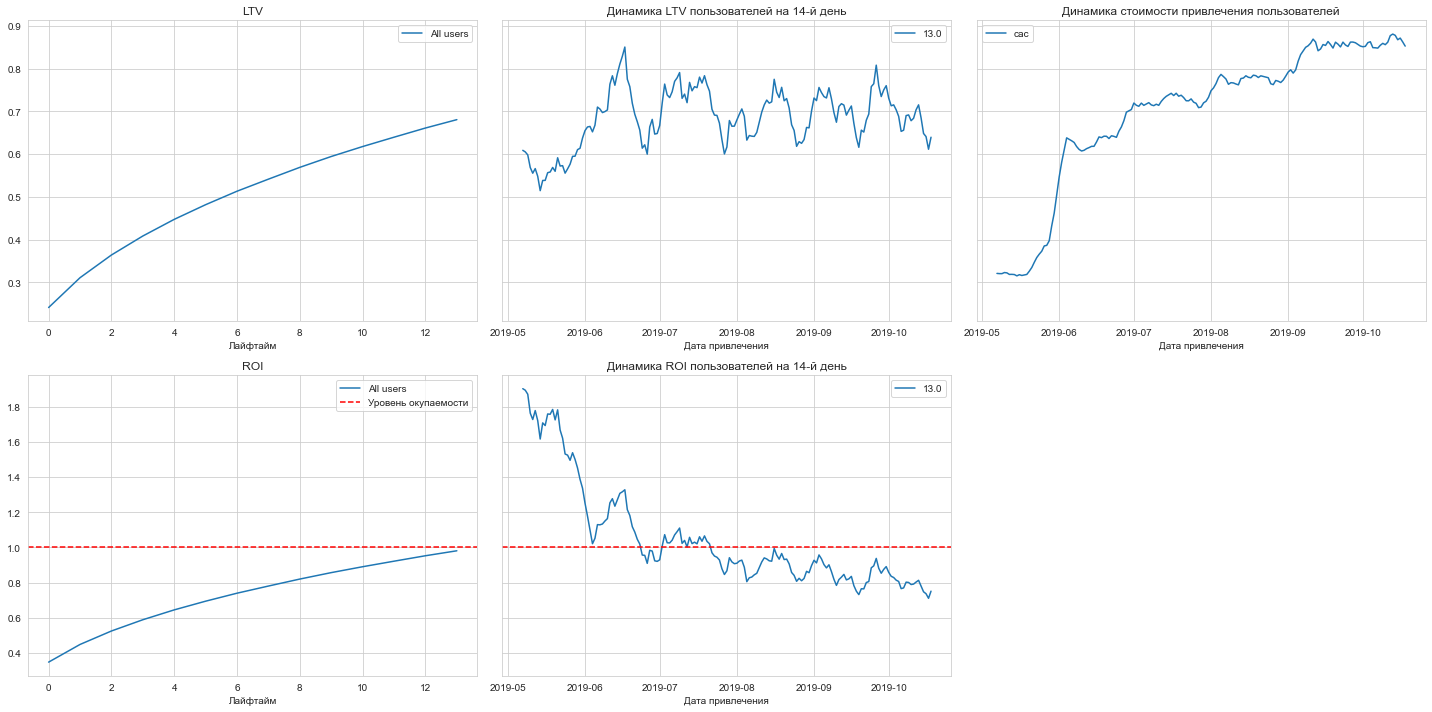

In [30]:
plot_ltv_roi(ltv=ltv,
             ltv_history=ltv_history,
             roi=roi,
             roi_history=roi_history,
             horizon=14,
             window=7)

## Итоги анализа общей окупаемости рекламы ##
1. Затараты на рекламу не окупаются
2. Стоимость привлечения новых пользователей растет
3. Постоянное падение окупаемости рекламы наблюдается со второй половины июля 2019
4. Поятонный рост стоимости привлечения новых пользователей наблюдается со второй половины июля 2019

<a id='payback_device'></a>
## Анализ окупаемости рекламы с учетом пользовательских устройств ##

In [31]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles=users,
                                                      purchases=data_orders,
                                                      observation_date=max_date_att.date(),
                                                      horizon_days=14,
                                                      dimensions=['device'])

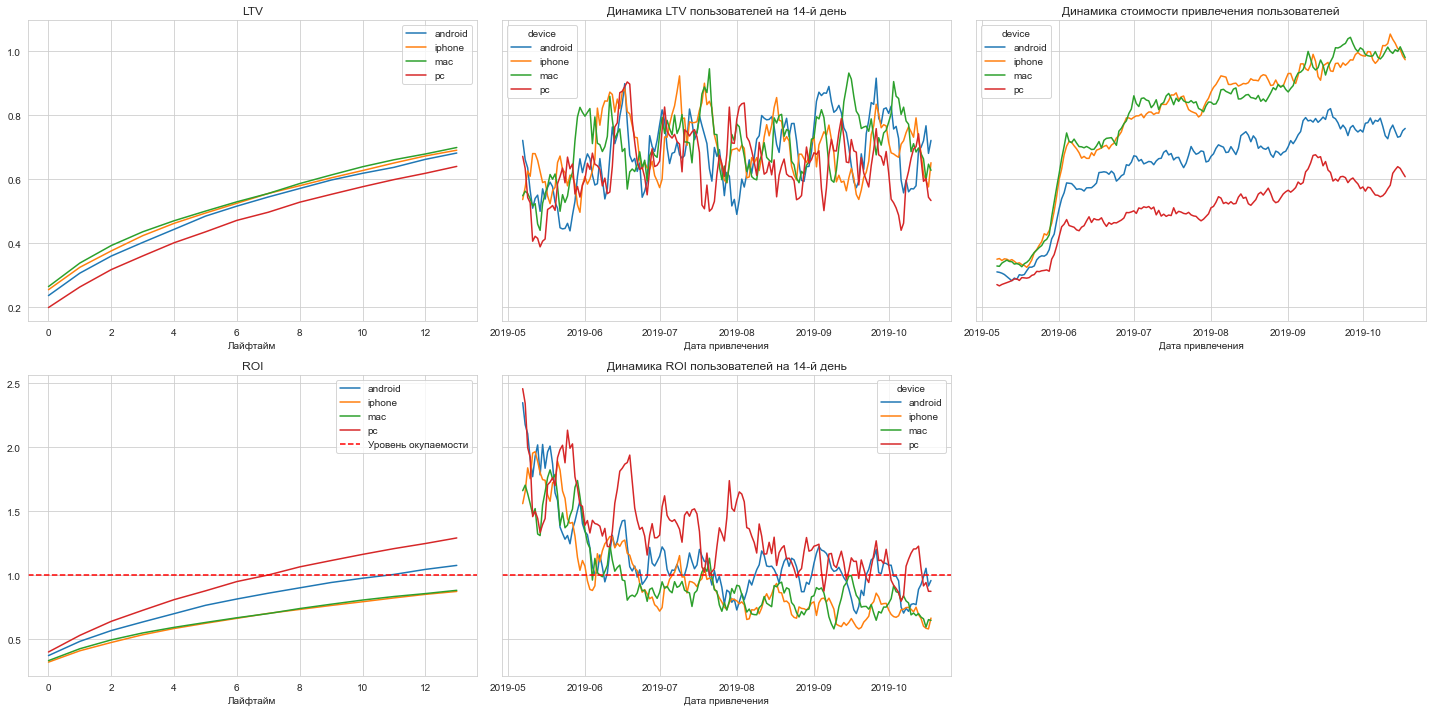

In [32]:
plot_ltv_roi(ltv=ltv,
             ltv_history=ltv_history,
             roi=roi,
             roi_history=roi_history,
             horizon=14,
             window=7)

## Итоги анализа окупаемости рекламы с учетом пользовательских устройств ##
1. окупаемость достинается только для пользователей android/pc
2. не смотря на то что LTV пользователей iphone/mac выше чем у остальных типов устройств, пользователи iphone/mac не окупаются
3. затраты на привлечение пользователей iphone/mac значительно выше чем на привлечение пользователей android/pc
Возможные причины:
   - разные каналы привлечения пользователей iphone/mac и android/pc
   - площадки одинаковы, но стоимость пользователей разных платформ разная

<a id='payback_country'></a>
## Анализ окупаемость рекламы для разных стран ##

In [33]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles=users,
                                                      purchases=data_orders,
                                                      observation_date=max_date_att.date(),
                                                      horizon_days=14,
                                                      dimensions=['region'])

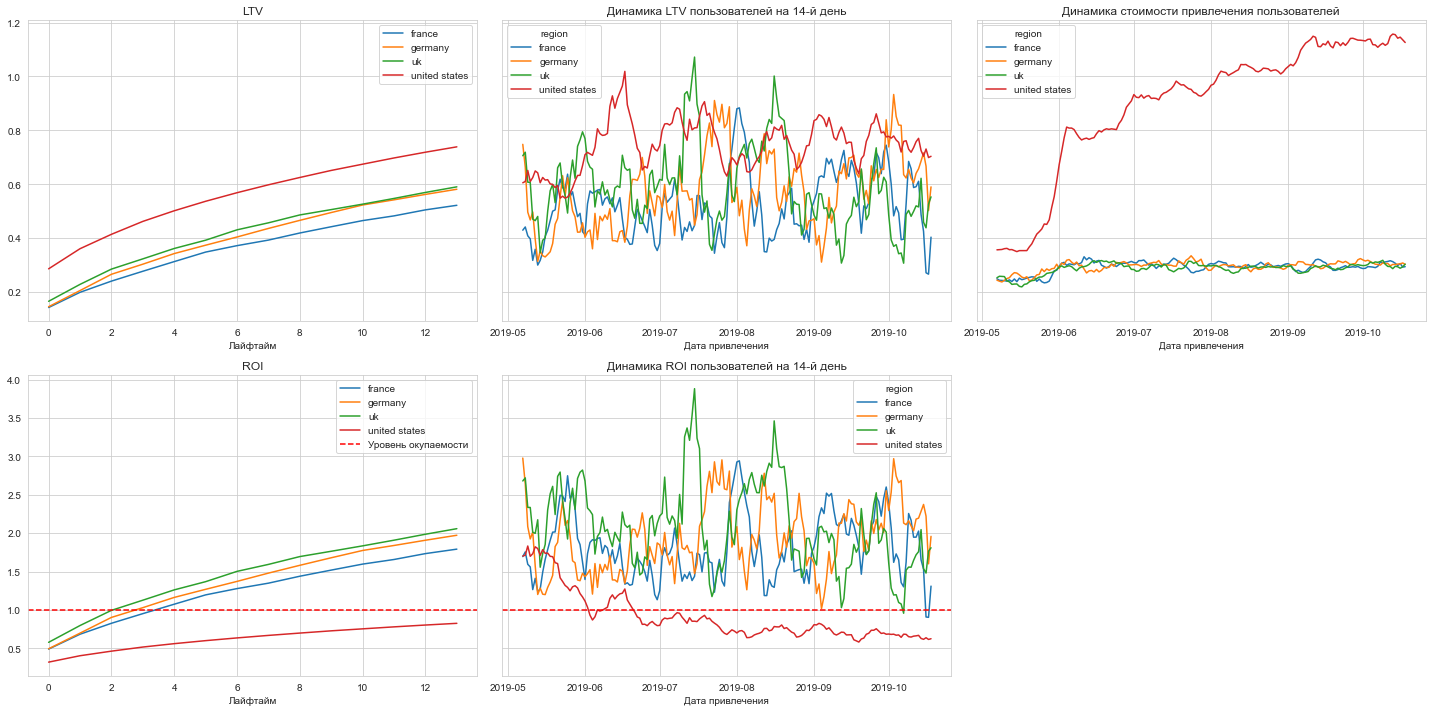

In [34]:
plot_ltv_roi(ltv=ltv,
             ltv_history=ltv_history,
             roi=roi,
             roi_history=roi_history,
             horizon=14,
             window=7)

## Итоги анализа окупаемости рекламы в разных странах ##
1. стоимость привлечения пользователей из США в 6 раз выше привлечения пользователей из других стран
2. пользователи из США не окупаются
3. рост стоимости привлечения пользователей из США совпадает со временем падения окупаемости
4. график падения окупаемости рекламы для проекта совпадает с графиком падения окупаемости пользоватлей из США

<a id='payback_channel'></a>
## Анализ окупаемости рекламы для разных каналов ##

In [35]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles=users,
                                                      purchases=data_orders,
                                                      observation_date=max_date_att.date(),
                                                      horizon_days=14,
                                                      dimensions=['channel'])

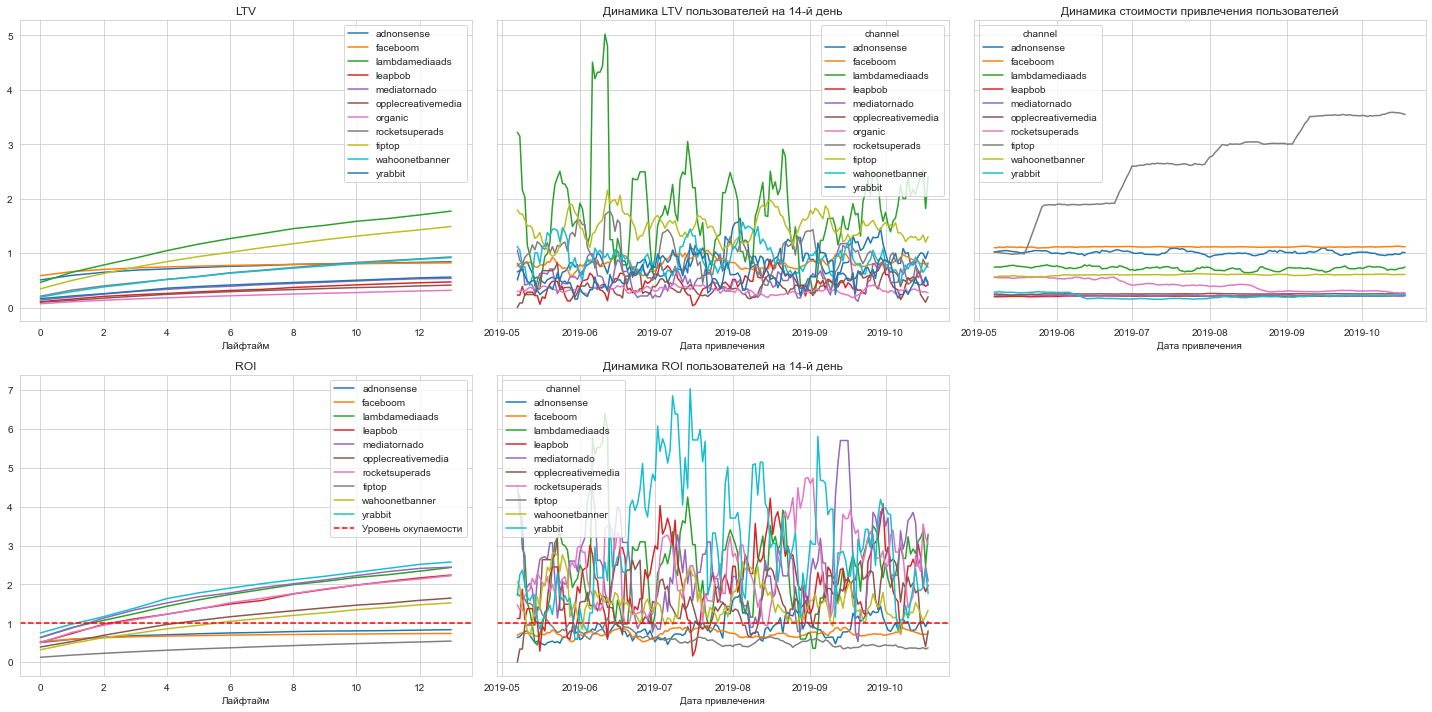

In [36]:
plot_ltv_roi(ltv=ltv,
             ltv_history=ltv_history,
             roi=roi,
             roi_history=roi_history,
             horizon=14,
             window=7)

## Итоги анализа окупаемости рекламы для разных каналов ##
1. не окупаются пользователи привлеченные следующими каналами:
   - tiptop
   - faceboom
   - adnosense
2. ежемесячный рост расходов на привлечение пользователей средствами канала tiptop

<a id='conv_ret'></a>
# Конверсия и удержание #

In [37]:
observation_date = pd.to_datetime('20191101', format='%Y%m%d')
horizon_days = 14

In [38]:
def viz_conv_ret(dimension=[]):
    conversion_raw, conversion, conversion_history = get_conversion(profiles=users,
                                                                    purchases=data_orders,
                                                                    observation_date=observation_date,
                                                                    horizon_days=horizon_days,
                                                                    dimensions=dimension)

    retention_raw, retention, retention_history = get_retention(profiles=users,
                                                                sessions=data_visits,
                                                                observation_date=observation_date,
                                                                horizon_days=horizon_days,
                                                                dimensions=dimension)

    # исключаем размеры когорт и удержание первого дня
    report = retention.drop(columns=['cohort_size', 0])

    # задаём размер сетки для графиков
    plt.figure(figsize = (20, 6))
    for i, payer in enumerate(users['payer'].unique()):
        report.query('payer == @payer')\
            .droplevel(['payer']).T\
            .plot(grid=True,
                  xticks=list(report.columns.values),
                  ax=plt.subplot(1, 2, i + 1))

    plt.xlabel('Лайфтайм')
    plt.title('Кривые удержания для payer = {}'.format(payer))
    plt.show()

    plt.figure(figsize=(20, 6)) # размер сетки для графиков
    report = conversion.drop(columns = 'cohort_size')

    report.T.plot(
        grid=True, xticks=list(report.columns.values), ax=plt.subplot(1, 2, 1)
    )  # во второй — кривые конверсии
    plt.title('Кривая конверсии')
    # постройте тепловую карту
    sns.heatmap(report,
                annot=True, fmt='.2%', ax=plt.subplot(1, 2, 2))
    plt.title('Тепловая карта конверсии')
    plt.show()

<a id='conv_ret_channel'></a>
## Конверсия и удержание с учетом канала привлечения ##

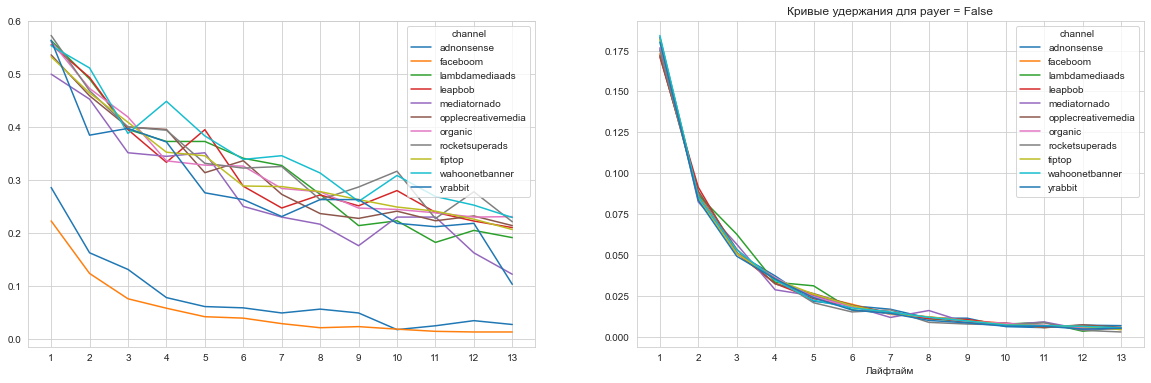

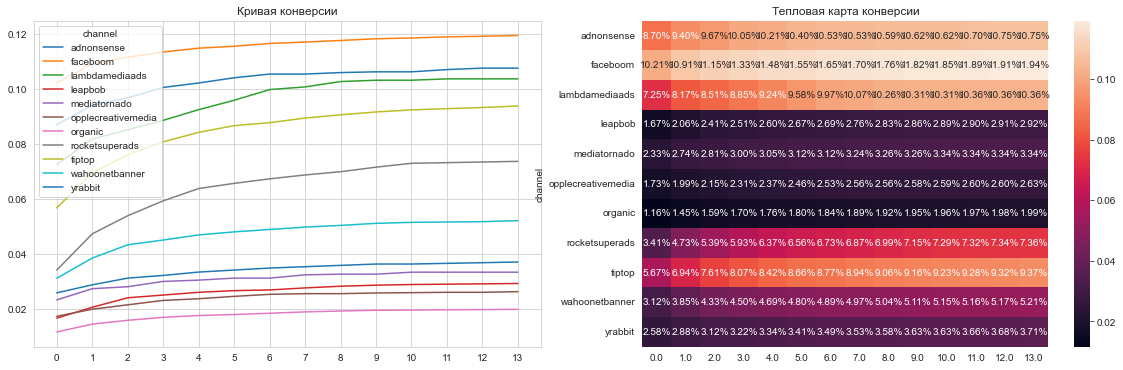

In [39]:
viz_conv_ret(dimension=['channel'])

## Итоги анализа конверсии и удержания с учетом канала привлечения ##
1. лидерами по привлечению новых платящих пользователей являются:
   - faceboom
   - adnonsense
   - lambdamediaads
   - tiptop
2. самое низкое удержание наблюдается среди пользователей привлеченных средствами:
   - adnonsense
   - faceboom
3. высокие показатели удержания наблюдаются среди пользователей привлеченных средствами:
   - lambdamediaads
   - tiptop

<a id='conv_ret_device'></a>
## Конверсия и удержание с учетом пользовательских устройств ##

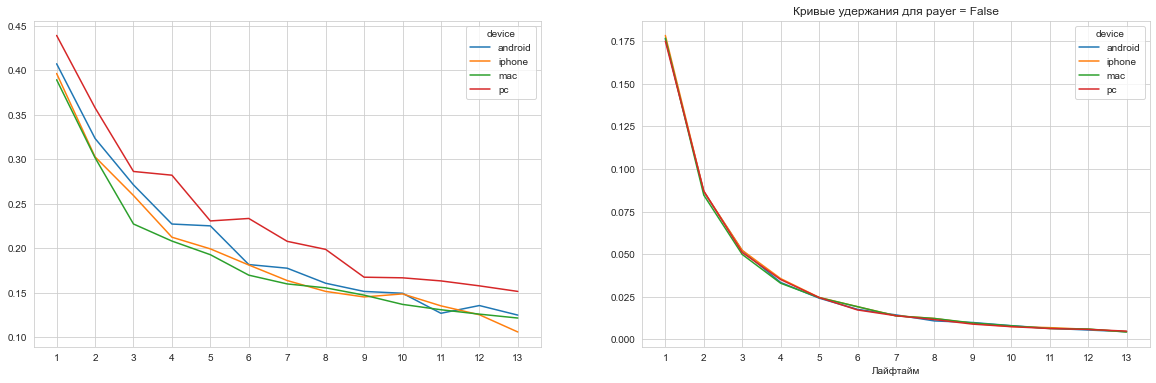

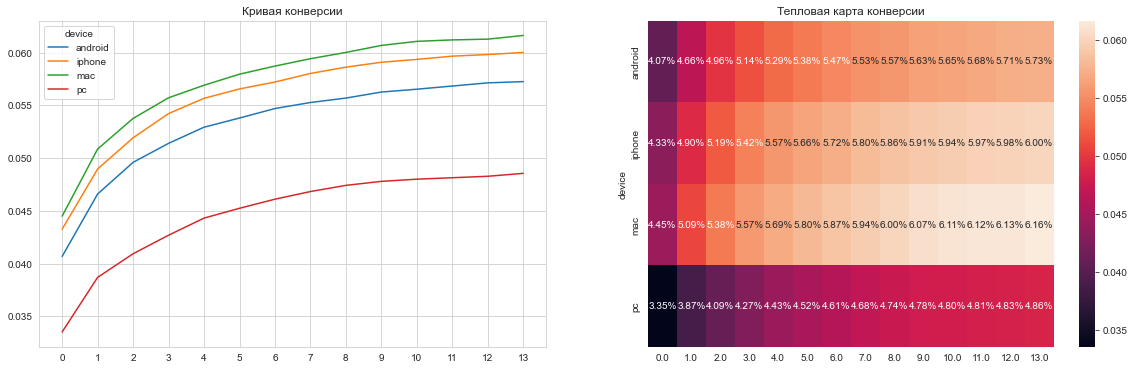

In [40]:
viz_conv_ret(dimension=['device'])

## Итоги анализа конверсии и удержания с учетом пользовательских устройств ##
1. низкая конверсия пользователей pc
2. удержание пользователей pc выше чем у остальных пользовательских платформ

<a id='conv_ret_region'></a>
## Конверсия и удержание с учетом региона ##

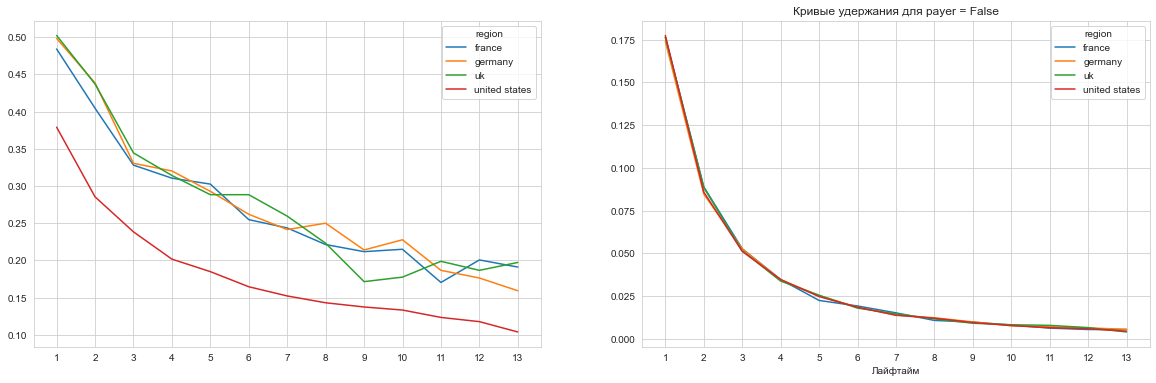

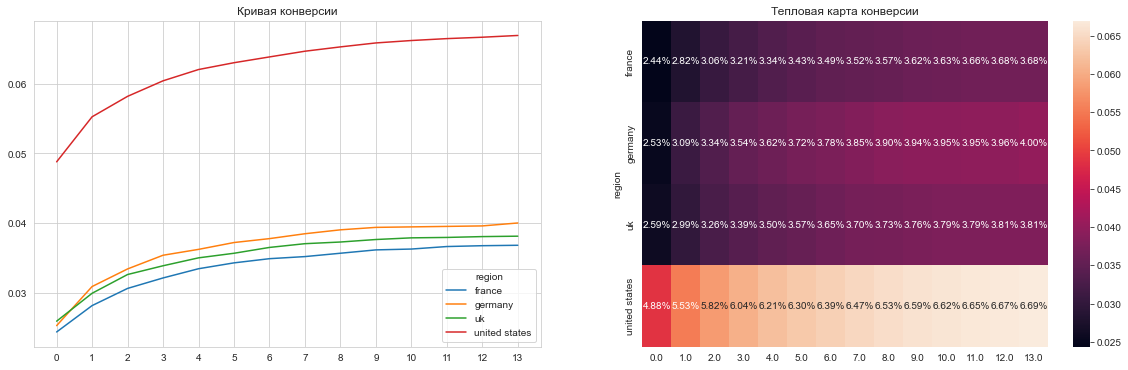

In [41]:
viz_conv_ret(dimension=['region'])

## Итоги анализа конверсии и удержания с учетом региона ##
1. высокая конверсия пользователей США
2. низкое удержание пользователей США

<a id='summary'></a>
# Вывод #
1. необходимо вяснить причины низкого удержания пользователей из США
2. необходимо выяснить причины низкой окупаемости пользователей:
   - mac
   - iphone
3. снизить расходы на рекламу на площадках:
   - faceboom
   - adnonsense
   - tiptop
4. увеличить расходы на рекламу на площадках:
   - lambdamediaads
   - rocketsuperads
5. снизить расходы на рекламу в США
6. увеличить расходы на рекламу в остальных регионах
7. снизить расходы на рекламу для пользователей:
   - mac
   - iphone
8. увеличить расходы на рекламу для пользователей:
   - pc
   - android